Klasifikasi Malicious dan Bening Website.
Dataset yang digunakan berasal dari webiste Kaggle :https://www.kaggle.com/xwolf12/malicious-and-benign-websites
 
Pengerjaan dalam percobaan kali ini terbagi menjadi beberapa tahapan seperti 

1.   Import Library yang dibutuhkan 
2.   Input data serta tahapan preproseccing dan analysis data
3.   Pembuatan Model klasifikasi menggunakan algoritma Random Forest
4.   Hasil pengujian klasifikasi menggunakan BACC



**Tahapan 1. Import Library yang dibutuhkan**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.metrics import average_precision_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

Tahapan 2. Proses Load dataset dan analysis dataset

In [ ]:
data=pd.read_csv('/content/drive/My Drive/Riset/malicious website/dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [ ]:
dataset=data.drop(['URL','CHARSET','SERVER','WHOIS_COUNTRY','WHOIS_STATEPRO','WHOIS_REGDATE','WHOIS_UPDATED_DATE'],axis=1)
dataset.head(2)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0


In [ ]:
dataset.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [ ]:
np.isnan(dataset)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1777,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1778,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1779,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.dropna(axis=0, how='all', subset=['CONTENT_LENGTH'], inplace=True)

Penerapan algoritma Extratree Classifier untuk mencari fitur-fitur yang terpenting 

[0.11838965 0.09868322 0.0730487  0.06345962 0.13876071 0.07968021
 0.06807175 0.06677346 0.07243322 0.08029006 0.07636257 0.06404683]


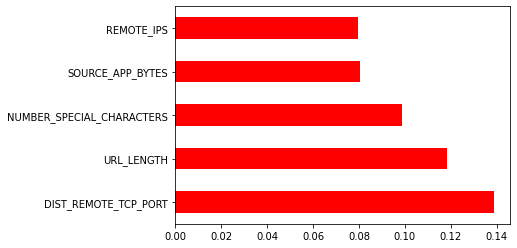

In [ ]:
X = dataset.iloc[:,0:12]
y = dataset.iloc[:,13]   
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh', color='red')
plt.show()

In [ ]:
data_baru=dataset[['REMOTE_APP_BYTES','REMOTE_IPS','NUMBER_SPECIAL_CHARACTERS','URL_LENGTH','DIST_REMOTE_TCP_PORT','Type']]
data_baru.head()

,REMOTE_APP_BYTES,REMOTE_IPS,NUMBER_SPECIAL_CHARACTERS,URL_LENGTH,DIST_REMOTE_TCP_PORT,Type
0,832,2,7,16,0,1
1,1230,4,6,16,7,0
2,0,0,6,16,0,0
3,4380,3,6,17,22,0
4,4586,5,6,17,2,0


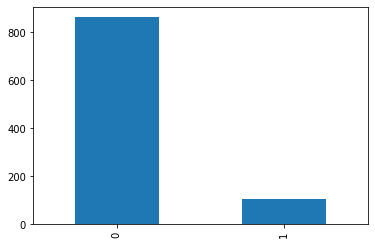

In [ ]:
data_baru['Type'].value_counts().plot.bar()

In [ ]:
print('Proportion of the classes in the data:')
print(data_baru['Type'].value_counts() / len(data_baru))

Proportion of the classes in the data:
0    0.890609
1    0.109391
Name: Type, dtype: float64


In [ ]:
malicious = data_baru[data_baru.Type == 1]
normal = data_baru[data_baru.Type == 0]

In [ ]:
malicious.URL_LENGTH.describe()

count    106.000000
mean      42.160377
std       15.978043
min       16.000000
25%       35.000000
50%       39.000000
75%       43.750000
max      105.000000
Name: URL_LENGTH, dtype: float64

In [ ]:
normal.URL_LENGTH.describe()

count    863.000000
mean      57.271147
std       26.062671
min       16.000000
25%       40.000000
50%       51.000000
75%       69.000000
max      249.000000
Name: URL_LENGTH, dtype: float64

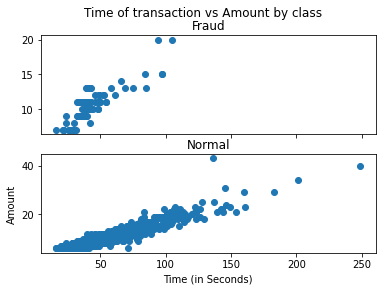

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(malicious.URL_LENGTH, malicious.NUMBER_SPECIAL_CHARACTERS)
ax1.set_title('Fraud')

ax2.scatter(normal.URL_LENGTH, normal.NUMBER_SPECIAL_CHARACTERS)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
X = data_baru.iloc[:, data_baru.columns != 'Type']
y = data_baru.iloc[:, data_baru.columns == 'Type']

Tahapan 3. Pembuatan model klasifikasi menggunakan Algoritma Random Forest

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

Model Klasifikasi Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
model_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


=== Accuracy ====
0.979381443298969


=== Confusion Matrix ===


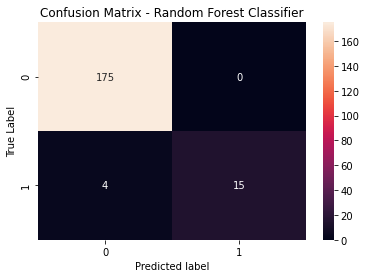



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       175
           1       1.00      0.79      0.88        19

    accuracy                           0.98       194
   macro avg       0.99      0.89      0.94       194
weighted avg       0.98      0.98      0.98       194





In [ ]:
print("=== Accuracy ====")
print(metrics.accuracy_score(y_test, model_pred))
print('\n')
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, model_pred)
plt.figure(1)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, model_pred))
print('\n')

In [ ]:
proba = model.predict_proba(X_test)[:,1] 
fpr, tpr, thresholds = metrics.roc_curve(y_test,proba)
roc_auc=auc(fpr, tpr)

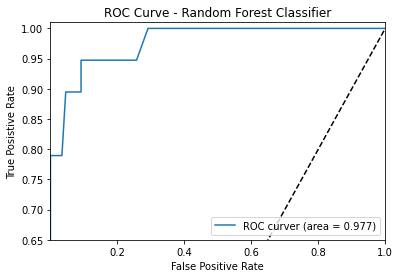

In [ ]:
  plt.figure(2)
  plt.xlim([4e-5, 1.0])
  plt.ylim([0.65, 1.01])
  plt.plot(fpr, tpr, label='ROC curver (area = %0.3f)' % roc_auc)
  plt.plot([0,1],[0,1],'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Posistive Rate')
  plt.title('ROC Curve - Random Forest Classifier')
  plt.legend(loc="lower right")
  plt.show()

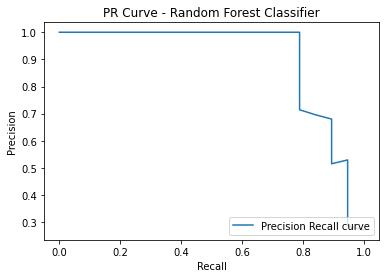

In [ ]:
p,r,f1 = precision_recall_curve(y_test,proba)
plt.figure(3)
plt.plot(r, p, label='Precision Recall curve' )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

Analysis akurasi klasifikasi Random Forest menggunakan metode BACC

In [ ]:
import math
TP = 175
TN = 14
FP = 0
FN = 5
P= TP+FP
N= TN+FN
BACC = ((TP/P)+(TN/N))/2
print('Nilai BACC nya sebesar : ',BACC)

Nilai BACC nya sebesar :  0.868421052631579
Nilai MCC nya sebesar :  0.44095855184409843


In [ ]:
X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


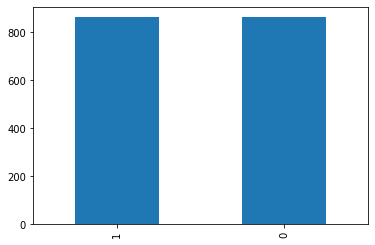

In [ ]:
pd.Series(y_resample).value_counts().plot.bar()

Model klasifikasi menggunakan Random Forest dan SMOTE

In [ ]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.2,random_state=5)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
model_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


=== Accuracy ====
0.9393063583815029


=== Confusion Matrix ===


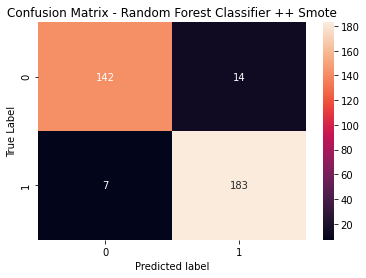



=== Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       156
           1       0.93      0.96      0.95       190

    accuracy                           0.94       346
   macro avg       0.94      0.94      0.94       346
weighted avg       0.94      0.94      0.94       346





In [ ]:
print("=== Accuracy ====")
print(metrics.accuracy_score(y_test, model_pred))
print('\n')
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, model_pred)
plt.figure(1)
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion Matrix - Random Forest Classifier ++ Smote")
plt.ylabel('True Label')
plt.xlabel('Predicted label')
plt.show()
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, model_pred))
print('\n')

Analysis akurasi klasifikasi Random Forest  + SMOTE menggunakan metode BACC

In [ ]:
TP = 142
TN = 182
FP = 14
FN = 8
P= TP+FP
N= TN+FN
BACC = ((TP/P)+(TN/N))/2
print('Nilai BACC nya sebesar : ',BACC)

Nilai BACC nya sebesar :  0.9340755735492577


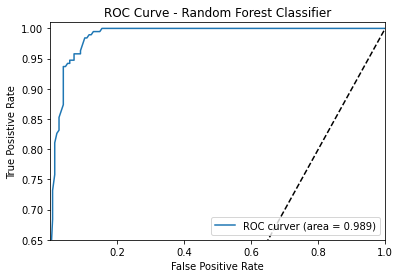

In [ ]:
proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,proba)
roc_auc=auc(fpr, tpr)

plt.figure(2)
plt.xlim([4e-5, 1.0])
plt.ylim([0.65, 1.01])
plt.plot(fpr, tpr, label='ROC curver (area = %0.3f)' % roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Posistive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

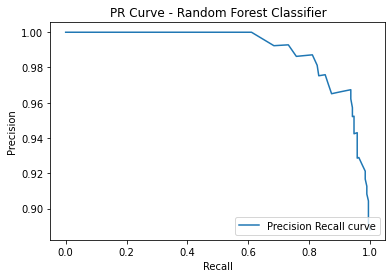

In [ ]:
p,r,f1 = precision_recall_curve(y_test,proba)
plt.figure(3)
plt.plot(r, p, label='Precision Recall curve' )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

Hasil analisis
1. Data yang diperolah dari website Kaggle tersebut bersifat unbalance atau tidak seimbang.
2. pada percobaan kali ini menggunakan metode Extratree Classifier yang berguna untuk pemilihan fitur-fitur terbaik pada dataset
3. Berdasarkan bantuan dari metode Extratree Classifier, terdapat 5 buah fitur terbaik denan nilai tertinggi sebesar 0.12 dan terkecil sebesar 0.09.
4. Hasil klasifikasi yang ditunjukkan oleh matrix confusion, menunjukkan bahwa hasil klasifikasi tanpa smote lebih baik ketimbang menggunakan smote
5. Berdasarkan metode evaluasi BACC menunjukkan bahwa, hasil klasifikasi terbaik menggunakan algortima Random Forest + SMOTE menjadi yang terbaik dibuktikan dengan nilai BACC yang lebih tinggi dibandingkan dengan model tanpa SMOTE